# Многомерный статистический анализ. Линейная регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

$b = \frac{n\sum_{i=1}^{n} x_iy_i-(\sum_{i=1}^{n} x_i)(\sum_{i=1}^{n} y_i)}{\sum_{i=1}^{n} x_i^2 - (\sum_{i=1}^{n} x_i)^2}$

#### Матричный метод поиска коэффициентов:

In [28]:
X = zp.reshape((10,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [29]:
y = ks.reshape((10,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [33]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)),X.T@y)
B

array([[5.88982042]])

#### Второй вариант: (можно ли так?)

y = a + bx, поскольку без a (intercept), отсюда:

In [3]:
a_noint = 0
b_noint = ks.mean()/zp.mean()
b_noint

7.000986193293885

$b = \frac{n\sum_{i=1}^{n} x_iy_i-(\sum_{i=1}^{n} x_i)(\sum_{i=1}^{n} y_i)}{\sum_{i=1}^{n} x_i^2 - (\sum_{i=1}^{n} x_i)^2}$

In [4]:
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b

2.620538882402765

In [5]:
n = 10

In [6]:
b = (n*(np.sum(zp*ks))-(np.sum(zp)*np.sum(ks)))/(n*(np.sum(zp**2))-(np.sum(zp)**2))
b

2.6205388824027653

$a = \overline{y} - b\overline{x}$

In [7]:
a = np.mean(ks) - (b * np.mean(zp))
a

444.17735732435955

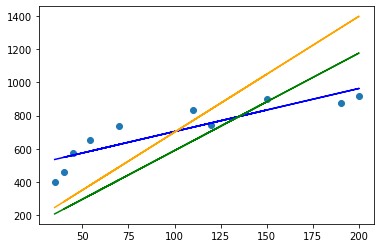

In [35]:
plt.scatter(zp,ks)
plt.plot(zp,444+2.6*zp, color='blue') # с intercept
plt.plot(zp,b_noint*zp, color='orange') # без intercept через выведенную формулу
plt.plot(zp,5.88982042*zp, color='green') # без intercept через матричный метод поиска коэффициентов
plt.show()

### Задание 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [9]:
x = zp
y = ks

In [10]:
def mse_(B1,y=y,x=x,n=n):
    return np.sum((B1*x-y)**2)/n

In [11]:
B1 = 0.1
n = 10

In [12]:
def mse_(B1,y=y,x=x,n=n):
    return np.sum((B1*x-y)**2)/n

In [13]:
alpha = 1e-6
alpha

1e-06

In [14]:
#mse=(1/n)*np.sum((B1*X-y)**2)

In [15]:
#mse_p=(2/n)*np.sum((B1*X-y)**X)

In [16]:
for i in range(5001):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    if i%500==0:
        print(f'{i}: B1 = {B1}, mse = {mse_(B1)}')

0: B1 = 0.25952808, mse = 493237.7212546963
500: B1 = 5.889815595583751, mse = 56516.858416040064
1000: B1 = 5.8898204201285544, mse = 56516.85841571941
1500: B1 = 5.889820420132673, mse = 56516.85841571943
2000: B1 = 5.889820420132673, mse = 56516.85841571943
2500: B1 = 5.889820420132673, mse = 56516.85841571943
3000: B1 = 5.889820420132673, mse = 56516.85841571943
3500: B1 = 5.889820420132673, mse = 56516.85841571943
4000: B1 = 5.889820420132673, mse = 56516.85841571943
4500: B1 = 5.889820420132673, mse = 56516.85841571943
5000: B1 = 5.889820420132673, mse = 56516.85841571943


### Задание 3

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Когда известна $\sigma$ генеральной совокупности используется критерий Z, когда сигма неизвестна используется критерий Стьюдента (t).

### Задание 4

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)

Немного подсмотрел по этому заданию. Какую тут A лучше использовать? И где вообще все эти формулы нужно было искать с interception? В этой теме как-то все очень повехностно получилось, очень много логических вопросов осталось!

In [17]:
def mse_intercept(A2,B1,y=y,x=x,n=n):
    return np.sum((A2+B1*x-y)**2)/n

In [18]:
A2 = 444
B2 = 0.1
alpha = 1e-6
n = 10
x = zp
y = ks

In [19]:
for i in range(3000001):
    A2 -= alpha * (2 / n) * np.sum(A2 + B2 * x - y)
    B2 -= alpha * (2 / n) * np.sum(((A2 + B2 * x) - y) * x)
    if i%1000000==0:
        print(f'{i}: A2 = {A2}, B2 = {B2}, mse = {mse_intercept(A2, B2)}')

0: A2 = 444.00051152, B2 = 0.16948477626374403, mse = 89323.56548781744
1000000: A2 = 444.0817433264543, B2 = 2.6212426433437246, mse = 6470.416520190547
2000000: A2 = 444.11978649479875, B2 = 2.6209626289469026, mse = 6470.415041923743
3000000: A2 = 444.14269293956767, B2 = 2.62079402747141, mse = 6470.41450598538


Тема для курсового, если успею https://www.kaggle.com/ahsen1330/us-police-shootings
Пока конкретно не решено, что буду исследовать там, подберу варианты. Крутится в голове Eda, дисперсионный анализ(не понимаю пока что и для чего он), отношение застреленных до 2000 и после, чернх, белых и т.д. Пока такая идея